In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\pelec\\Desktop\\Turing College\\DS\\1st sprint\\Project Sprint 2\\spotifytoptracks.csv',
                   index_col=0)

In [3]:
df = pd.DataFrame(data)

In [4]:
Performing data cleaning
◘ Checking for null values
◘ Droping dublicates
◘ Checking for any possible outliers

SyntaxError: invalid character '◘' (U+25D8) (297314179.py, line 2)

In [6]:
df.isnull().any()
df = df.drop_duplicates()
df.describe()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


In [7]:
How many observations are there in this dataset?

Object `dataset` not found.


In [8]:
df.shape[0]

50

In [9]:
How many features this dataset has?

Object `has` not found.


In [10]:
len(df.loc[0])

16

In [57]:
# Which of the features are categorical?
col = [0,1,2,15]
df.columns[col]

Index(['artist', 'album', 'track_name', 'genre'], dtype='object')

In [10]:
# Which of the features are numeric?
col = [4,5,6,7,8,9,10,11,12,13,14]
df.columns[col]

Index(['energy', 'danceability', 'key', 'loudness', 'acousticness',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64


<Axes: xlabel='artist'>

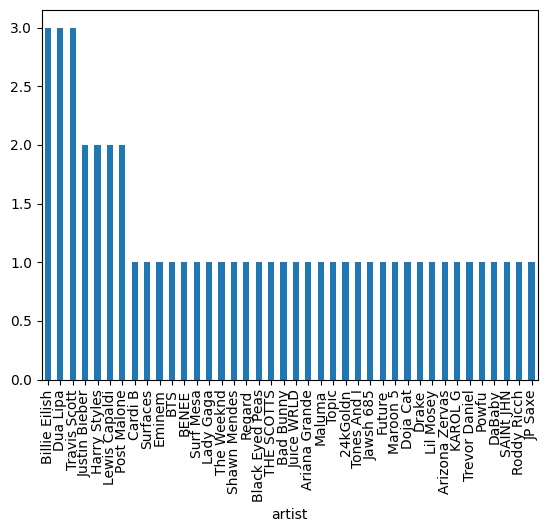

In [11]:
# Are there any artists that have more than 1 popular track? If yes, which and how many?
print(df.artist.value_counts()[df.artist.value_counts() > 1])
df.artist.value_counts().plot(kind="bar")

In [12]:
# Who was the most popular artist?
df.artist.value_counts().idxmax()

'Billie Eilish'

In [13]:
# How many artists in total have their songs in the top 50?

len(df.artist.unique())

40

album
Changes                 2
Fine Line               2
Future Nostalgia        3
Hollywood's Bleeding    2
dtype: int64


<Axes: xlabel='album'>

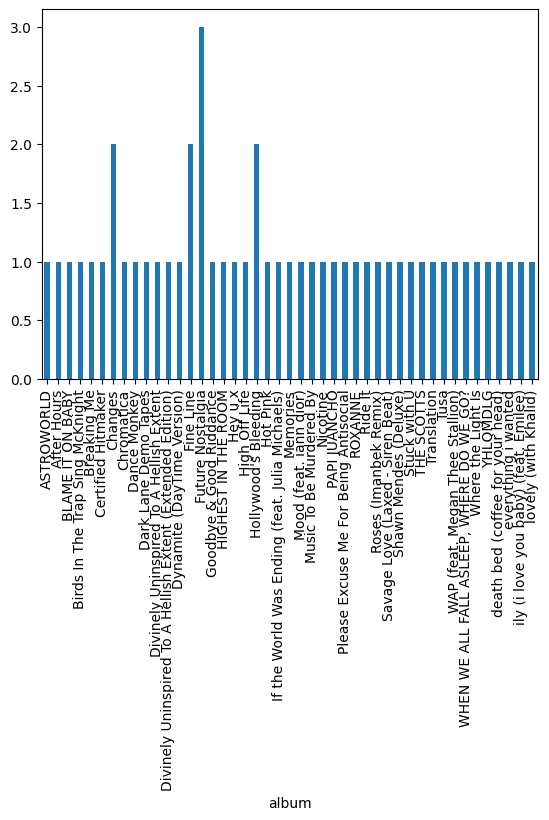

In [14]:
# Are there any albums that have more than 1 popular track? If yes, which and how many?

print(df.groupby('album').size()[df.groupby('album').size() > 1])
df.groupby('album').size().plot(kind="bar")

In [15]:
# How many albums in total have their songs in the top 50?

len(df.album.value_counts())

45

In [16]:
# Which tracks have a danceability score above 0.7?

df.loc[df['danceability'] > 0.7, 'track_name']

1                                      Dance Monkey
2                                           The Box
3                             Roses - Imanbek Remix
4                                   Don't Start Now
5                      ROCKSTAR (feat. Roddy Ricch)
7                  death bed (coffee for your head)
8                                           Falling
10                                             Tusa
13                                  Blueberry Faygo
14                         Intentions (feat. Quavo)
15                                     Toosie Slide
17                                           Say So
18                                         Memories
19                       Life Is Good (feat. Drake)
20                 Savage Love (Laxed - Siren Beat)
22                                      Breaking Me
24                              everything i wanted
25                                         Señorita
26                                          bad guy
27          

In [17]:
# Which tracks have a danceability score below 0.4?

df[df['danceability'] < 0.4]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
44,Billie Eilish,lovely (with Khalid),lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,0.296,0.351,4,-10.109,0.934,0.0333,0.0,0.095,0.12,115.284,200186,Chamber pop


In [18]:
# Which tracks have their loudness above -5

df.loc[df['loudness'] > -5, 'track_name']

4                                   Don't Start Now
6                                  Watermelon Sugar
10                                             Tusa
12                                          Circles
16                                    Before You Go
17                                           Say So
21                                        Adore You
23                           Mood (feat. iann dior)
31                                   Break My Heart
32                                         Dynamite
33                 Supalonely (feat. Gus Dapperton)
35                  Rain On Me (with Ariana Grande)
37    Sunflower - Spider-Man: Into the Spider-Verse
38                                            Hawái
39                                          Ride It
40                                       goosebumps
43                                          Safaera
48                                         Physical
49                                       SICKO MODE
Name: track_

In [19]:
# Which tracks have their loudness below -8?

df.loc[df['loudness'] < -8, 'track_name']

7                   death bed (coffee for your head)
8                                            Falling
15                                      Toosie Slide
20                  Savage Love (Laxed - Siren Beat)
24                               everything i wanted
26                                           bad guy
36                               HIGHEST IN THE ROOM
44                              lovely (with Khalid)
47    If the World Was Ending - feat. Julia Michaels
Name: track_name, dtype: object

In [20]:
# Which track is the longest?

print(df.loc[df['duration_ms'].idxmax(), 'track_name'])

SICKO MODE


In [21]:
# Which track is the shortest?

df.loc[df['duration_ms'].idxmin(), 'track_name']

'Mood (feat. iann dior)'

The most popular genre Pop


Text(0.5, 1.0, 'Distribution of Genres')

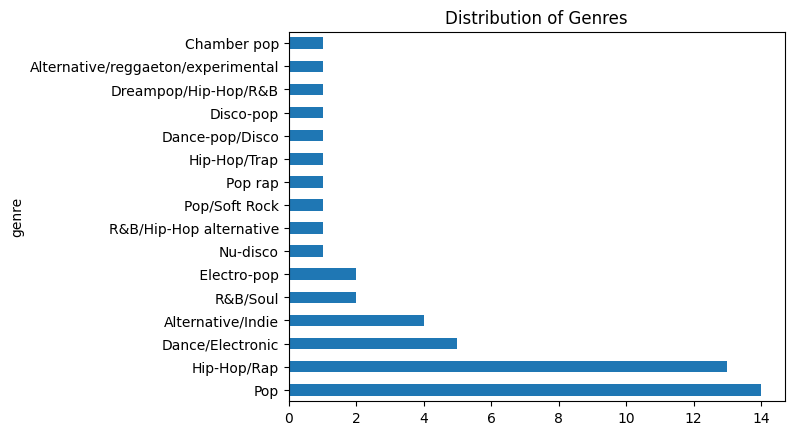

In [61]:
# Which genre is the most popular?

print('The most popular genre', df['genre'].value_counts().idxmax())
ax = df['genre'].value_counts().plot(kind="barh")
ax.set_title('Distribution of Genres')

In [23]:
# Which genres have just one song on the top 50?

df['genre'].value_counts()[df['genre'].value_counts() == 1]

genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64

In [24]:
# How many genres in total are represented in the top 50?

len(df['genre'].unique())

16

Max corr 0.7511538349500361
Min corr -0.6389922909081498


<Axes: >

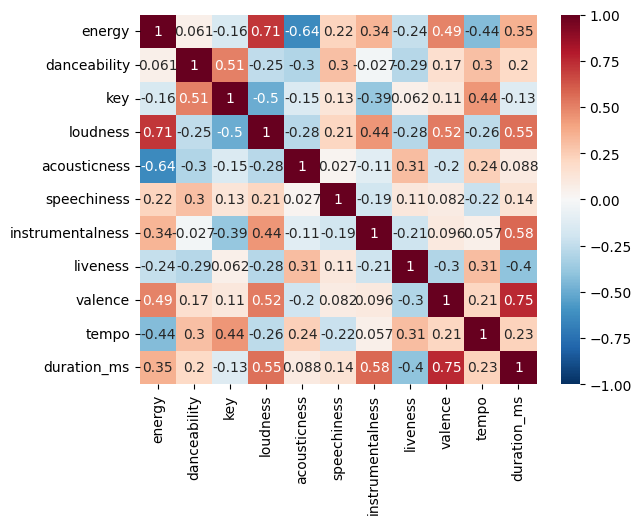

In [39]:
# Which features are strongly positively correlated? .corr()

col = [4,5,6,7,8,9,10,11,12,13,14]
cs = df.loc[col]
corr = cs.select_dtypes('number').corr()
max_corr = np.triu(corr, k=1).max() # np.triu exclude all below triangular values in matrix and k=1 exclude diagonal elements of matrix
min_corr = np.triu(corr, k=1).min()
print('Max corr', max_corr)
print('Min corr', min_corr)
sns.heatmap(corr, cmap="RdBu_r", annot=True, vmin=-1, vmax=1)

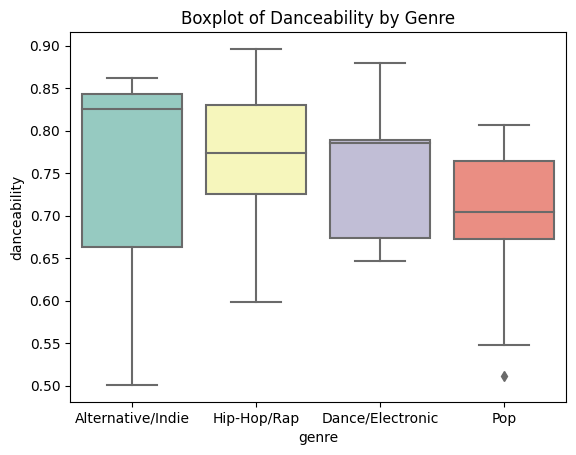

In [111]:
genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

df_selected_genres = df[df['genre'].isin(genres)]
z_scores = stats.zscore(df_selected_genres['danceability'])
df_selected_genres = df_selected_genres[abs(z_scores) <= 1.96]

sns.boxplot(x='genre', y='danceability', data=df_selected_genres, palette='Set3')
plt.title('Boxplot of Danceability by Genre')
plt.show()

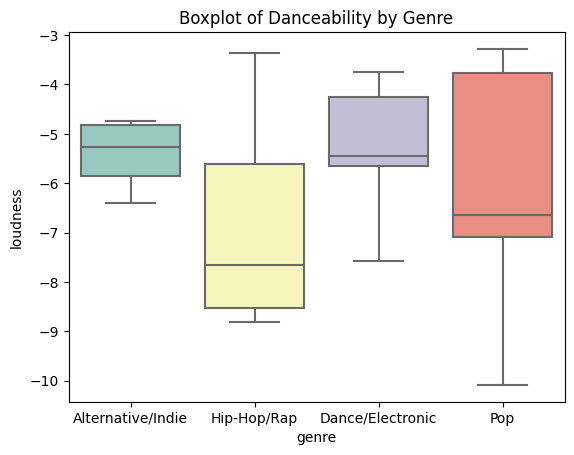

In [110]:
genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

df_selected_genres = df[df['genre'].isin(genres)]
z_scores = stats.zscore(df_selected_genres['loudness'])
df_selected_genres = df_selected_genres[abs(z_scores) <= 1.96]

sns.boxplot(x='genre', y='loudness', data=df_selected_genres, palette='Set3')
plt.title('Boxplot of Danceability by Genre')
plt.show()

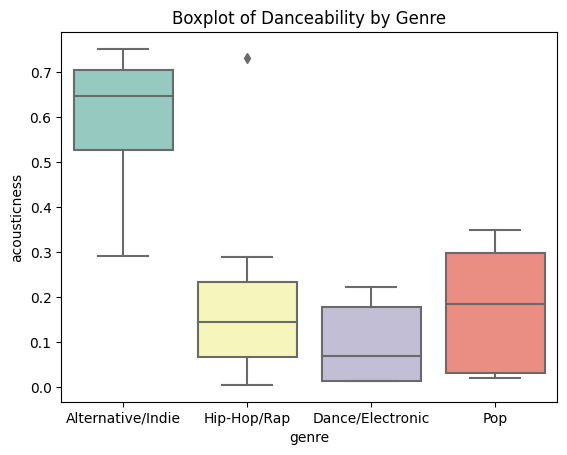

In [109]:
genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

df_selected_genres = df[df['genre'].isin(genres)]
z_scores = stats.zscore(df_selected_genres['acousticness'])
df_selected_genres = df_selected_genres[abs(z_scores) <= 1.96]

sns.boxplot(x='genre', y='acousticness', data=df_selected_genres, palette='Set3')
plt.title('Boxplot of Danceability by Genre')
plt.show()